In [168]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import filters
from collections import deque
import copy
from itertools import product

### Question 1 
Find tightest bounding circles for the objectspresentin the given image.[3 Marks] <br>
**Expected O/Ps**: centers & radiuses of those circles, and a visualization showing both the objects and the circles in a singleimage.0.25 marks for the center[0.15] andthe radius[0.1] for any object . [0.75] marks for thev isualization. <br>

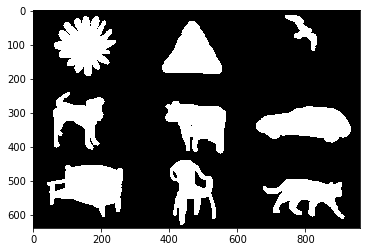

(639, 960, 3)


In [63]:
image = cv2.imread("Project1.png")
plt.imshow(image)
plt.show()
print(image.shape)

In [121]:
def get_components(image):
    gray_img = np.mean(image,2)
    val = filters.threshold_otsu(gray_img)
    gray_img[gray_img >= val] = 1
    gray_img[gray_img < val] = 0
    
    rows, cols = gray_img.shape[0], gray_img.shape[1]
    visited = np.zeros((rows,cols))

    answer = np.zeros((rows,cols))
    centers = {}
    c = 1
    for i in range(rows):
        for j in range(cols):

            if(gray_img[i][j] == 0.0):
                visited[i,j] = 1
            elif(visited[i,j]):
                continue
            else:
                stack = deque()
                stack.append((i,j))
                
                centers[c] = []
                
                while(len(stack)!=0):
                    curr = stack.pop()
                    if(visited[curr[0],curr[1]] == 0):
                        visited[curr[0],curr[1]] = 1
                        m,n = curr[0],curr[1]
                        answer[m,n] = c
                        list_ = []
                        for x in range(m-1, m+2):
                            for y in range(n-1, n+2):
                                if(x == m and y == n):
                                    continue
                                else:
                                    if(x <0 or x > rows -1):
                                        continue
                                    if(y <0 or y > cols -1):
                                        continue

                                    if(gray_img[x,y] == 1.0):
                                        centers[c].append((x,y))
                                        stack.append((x,y))
                c = c + 1


    print("Number of connected components : ", np.amax(answer))
    return np.amax(answer), centers


In [122]:
def get_bounding_circles(image):
    
    n, centers = get_components(image)
    
    centers_radius = {}
    for key in list(centers.keys()):
        arr = np.array(centers[key])
        center_x, center_y = np.mean(arr,0)
        radius = max((np.max(arr[:,0]) - np.min(arr[:,0]))/2, (np.max(arr[:,1]) - np.min(arr[:,1]))/2)
        centers_radius[key] = {"center_coordinates" : (int(center_y), int(center_x)), "radius": int(radius+2)}
        print("centre coordinates : ", "(", int(center_y), int(center_x), ")", "radius : ",int(radius) )
    
    curr_image = copy.deepcopy(image)
    for key in list(centers_radius.keys()):
        
        color = (255, 0, 0)
        
        thickness = 2
        curr_image = cv2.circle(curr_image, centers_radius[key]["center_coordinates"], centers_radius[key]["radius"], color, thickness)
    
    fig = plt.figure(figsize = (10,10))
    plt.imshow(curr_image)
    plt.show()
    
    return centers_radius

Number of connected components :  9.0
centre coordinates :  ( 793 59 ) radius :  53
centre coordinates :  ( 151 101 ) radius :  91
centre coordinates :  ( 468 128 ) radius :  88
centre coordinates :  ( 133 315 ) radius :  85
centre coordinates :  ( 486 332 ) radius :  89
centre coordinates :  ( 803 333 ) radius :  140
centre coordinates :  ( 461 521 ) radius :  94
centre coordinates :  ( 168 515 ) radius :  112
centre coordinates :  ( 803 541 ) radius :  120


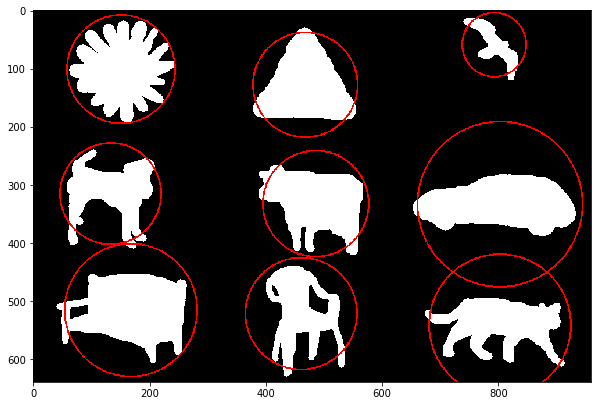

In [123]:
center_radius = get_bounding_circles(image)

### Question 2
Find Jaccard Similarity scores for each of the objects in the image given with respect to their corresponding circular regions obtained in Q1.[2 Marks] <br>
[0.65] marks for implementing the Jaccard Similarity module that takes two binary masks as inputs and outputs the required score.[0.15] marks for Jaccard Similarity score for any object. 

In [124]:
def jaccard_similarity(binary_mask1, binary_mask2):
    intersection = len(list(set(binary_mask1).intersection(binary_mask2)))
    union = (len(binary_mask1) + len(binary_mask2)) - intersection
    return float(intersection) / union
    

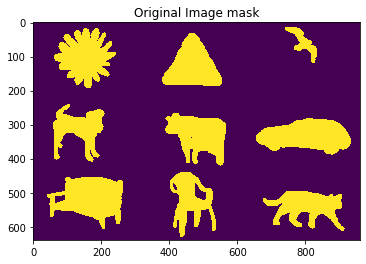

In [125]:
gray_img = np.mean(image,2)
val = filters.threshold_otsu(gray_img)
gray_img[gray_img >= val] = 1
gray_img[gray_img < val] = 0
plt.imshow(gray_img)
plt.title("Original Image mask")
plt.show()

Number of connected components :  9.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


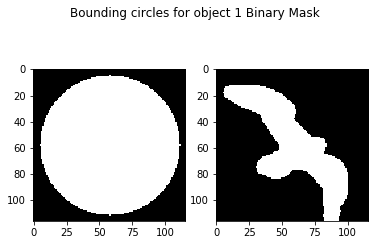

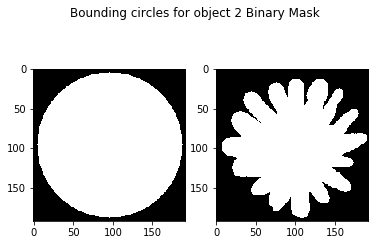

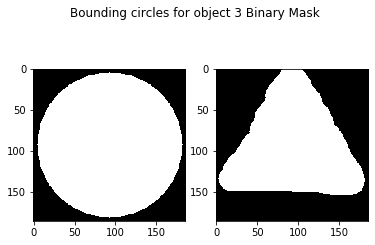

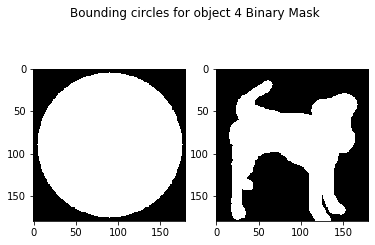

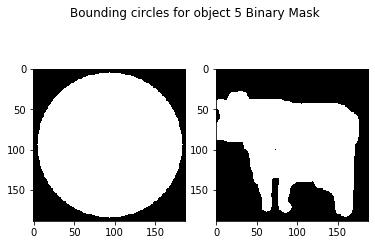

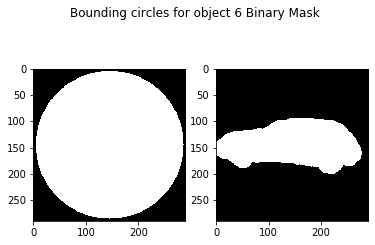

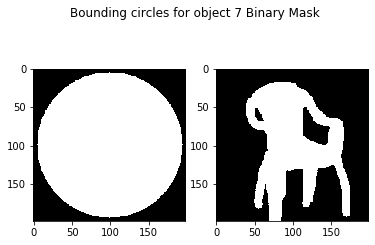

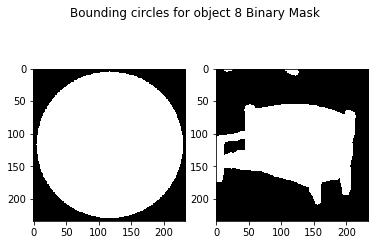

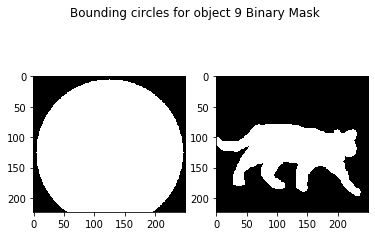

In [111]:
n, centers = get_components(image)
centers_radius = {}
for key in list(centers.keys()):
    arr = np.array(centers[key])
    center_x, center_y = np.mean(arr,0)
    radius = max((np.max(arr[:,0]) - np.min(arr[:,0]))/2, (np.max(arr[:,1]) - np.min(arr[:,1]))/2)
    centers_radius[key] = {"center_coordinates" : (int(center_y), int(center_x)), "radius": int(radius)}
#     print("centre coordinates : ", "(", int(center_y), int(center_x), ")", "radius : ",int(radius) )


for key in list(centers_radius.keys()):
    curr_image = copy.deepcopy(image)
    curr_image = np.zeros(curr_image.shape)
    color = (255, 255, 255)
    thickness = -1
    y,x = center_radius[key]["center_coordinates"]
    radius = centers_radius[key]["radius"] + 5
    curr_image = cv2.circle(curr_image, centers_radius[key]["center_coordinates"], centers_radius[key]["radius"], color, thickness)
#     curr_image = np.mean(curr_image,2)
    curr_image = curr_image[x - radius : x + radius , y - radius : y + radius]
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle("Bounding circles for object " + str(key) + " Binary Mask")
    ax1.imshow(curr_image)
    ax2.imshow(image[x - radius : x + radius , y - radius : y + radius])

In [181]:
def points_in_circle_np(radius, x0=0, y0=0, ):
    x_ = np.arange(x0 - radius - 1, x0 + radius + 1, dtype=int)
    y_ = np.arange(y0 - radius - 1, y0 + radius + 1, dtype=int)
    x, y = np.where((x_[:,np.newaxis] - x0)**2 + (y_ - y0)**2 <= radius**2)
    # x, y = np.where((np.hypot((x_-x0)[:,np.newaxis], y_-y0)<= radius)) # alternative implementation
    list_ = []
    for x, y in zip(x_[x], y_[y]):
        list_.append((x,y))
    return list_

In [190]:
def get_jaccard_similarity(image):
    n, centers = get_components(image)
    centers_radius = {}
    for key in list(centers.keys()):
        arr = np.array(centers[key])
        center_x, center_y = np.mean(arr,0)
        radius = max((np.max(arr[:,0]) - np.min(arr[:,0]))/2, (np.max(arr[:,1]) - np.min(arr[:,1]))/2)
        centers_radius[key] = {"center_coordinates" : (int(center_y), int(center_x)), "radius": int(radius)}
        
    circle_coordinates = {}
    for key in list(center_radius.keys()):
        radius = center_radius[key]["radius"]
        y,x = center_radius[key]["center_coordinates"]
        
        circle_coordinates[key] = points_in_circle_np(radius,y,x)
        IOU = jaccard_similarity(centers[key], circle_coordinates[key])
        print("The IOU (jaccard similarity) score is : ", IOU)
    return circle_coordinates, centers
                

In [191]:
circle_coordinates,centers = get_jaccard_similarity(image)

Number of connected components :  9.0
The IOU (jaccard similarity) score is :  0.09398392862598919
The IOU (jaccard similarity) score is :  0.12150939119374886
The IOU (jaccard similarity) score is :  0.11378945885005637
The IOU (jaccard similarity) score is :  0.10705324289577514
The IOU (jaccard similarity) score is :  0.11112099583244942
The IOU (jaccard similarity) score is :  0.09903267001668485
The IOU (jaccard similarity) score is :  0.10686318881668275
The IOU (jaccard similarity) score is :  0.10986250520005547
The IOU (jaccard similarity) score is :  0.0998297260984662


In [194]:
len(circle_coordinates[1])

9477

In [195]:
len(centers[1])

26328

In [197]:
a = points_in_circle_np(10,11,11)
print(a)

[(1, 11), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (8, 17), (8, 18), (8, 19), (8, 20), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8